Import Packages

In [3]:
import librosa
from librosa import display
import os
import glob 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import IPython.display as ipd  
import sys
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn.functional as F

Load Data

In [4]:
# mount google drive
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


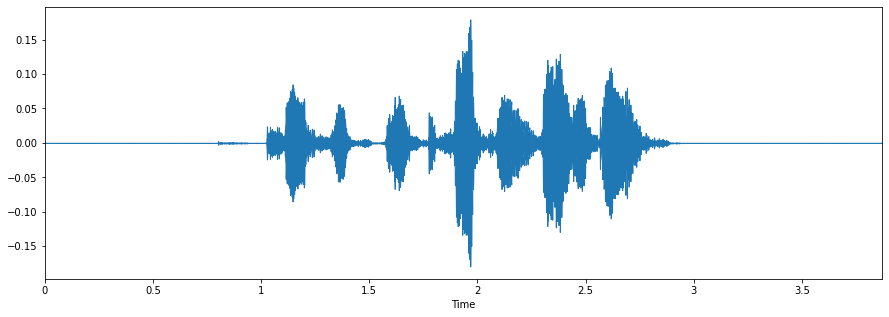

In [5]:
# display a random sample 
data, sampling_rate = librosa.load("/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Angry/03-01-05-01-01-01-01.wav")
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# let's play the audio 
ipd.Audio("/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Angry/03-01-05-01-01-01-01.wav")

In [ ]:
### Load all the voice data and convert them into mfcc ###

path = "/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions"
lst = []
i = -2
start_time = time.time()

for subdir, dirs, files in os.walk(path):
    i=i+1
    print(subdir)
    print(i)
    for file in files:
      #if not file.startswith('.') and os.path.isfile(os.path.join(subdir, file)):
      
            #print(os.path.join(subdir,file))
        
            #Load librosa array, obtain mfcss, add them to array and then to list.
      X, sample_rate = librosa.load(os.path.join(subdir,file))
      mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_fft=4096, hop_length=256, n_mfcc=40).T,axis=0) 
      arr = mfccs, i
      lst.append(arr) #Here we append the MFCCs to our list.
            
    print("--- Data loaded. Loading time: %s seconds ---" % (time.time() - start_time))

/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions
-1
--- Data loaded. Loading time: 0.0016939640045166016 seconds ---
/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Angry
0
--- Data loaded. Loading time: 996.2037079334259 seconds ---
/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Fearful
1
--- Data loaded. Loading time: 1916.6860072612762 seconds ---
/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Happy
2
--- Data loaded. Loading time: 2891.120340824127 seconds ---
/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Sad
3


A Glimpse into the Data

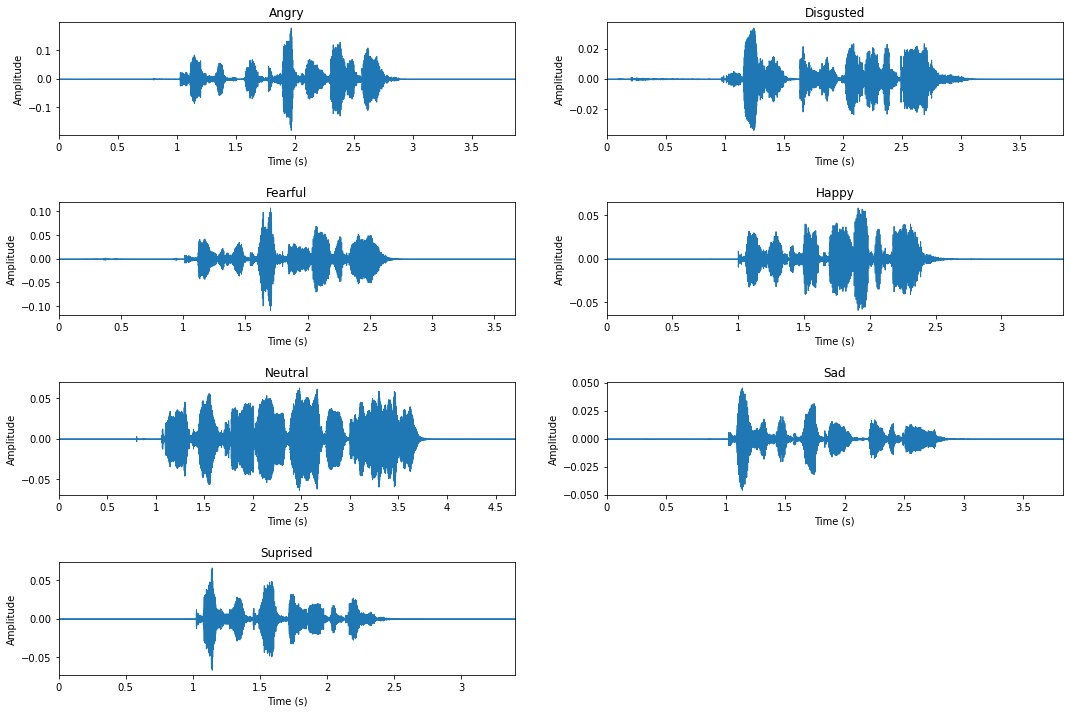

In [ ]:
### plot every type of the speech emotion in the dataset ### 

path = "/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/"

fig = plt.figure(figsize=(18,12))
plt.subplots_adjust(hspace=0.6)

## Angry 
plt.subplot(4, 2, 1)
path_angry = path + 'Angry/03-01-05-01-01-01-01.wav'
angry, sample_rate = librosa.load(path_angry)
librosa.display.waveplot(angry, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Angry')

## Disgusited 
plt.subplot(4, 2, 2)
path_disg = path + 'Disgusted/03-01-07-01-01-01-01.wav'
disg, sample_rate = librosa.load(path_disg)
librosa.display.waveplot(disg, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Disgusted')

## Fearful 
plt.subplot(4, 2, 3)
path_fear = path + 'Fearful/03-01-06-01-01-01-01.wav'
fear, sample_rate = librosa.load(path_fear)
librosa.display.waveplot(fear, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Fearful')

## Happy 
plt.subplot(4, 2, 4)
path_happy = path + 'Happy/03-01-03-01-01-01-01.wav'
happy, sample_rate = librosa.load(path_happy)
librosa.display.waveplot(happy, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Happy')

## Neutral  
plt.subplot(4, 2, 5)
path_neut = path + 'Neutral/03-02-01-01-02-02-20.wav'
neut, sample_rate = librosa.load(path_neut)
librosa.display.waveplot(neut, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Neutral')

## Sad 
plt.subplot(4, 2, 6)
path_sad = path + 'Sad/03-01-04-01-01-01-01.wav'
sad, sample_rate = librosa.load(path_sad)
librosa.display.waveplot(sad, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Sad')

## Suprised
plt.subplot(4, 2, 7)
path_sup = path + 'Suprised/03-01-08-01-01-01-01.wav'
sup, sample_rate = librosa.load(path_sup)
librosa.display.waveplot(sup, sr=sample_rate)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Suprised')

plt.show()

In [ ]:
# Source - RAVDESS; Gender - Female; Emotion - happy 
path = "/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Happy/03-01-03-01-01-01-02.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
female = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
female = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(female))

# Source - RAVDESS; Gender - Male; Emotion - happy 
path = "/content/gdrive/My Drive/Colab Notebooks/datasets/Emotions/Happy/03-01-03-01-01-01-01.wav"
X, sample_rate = librosa.load(path, res_type='kaiser_fast',duration=2.5,sr=22050*2,offset=0.5)  
male = librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13)
male = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
print(len(male))

# Plot the two audio waves together
plt.figure(figsize=(20, 15))
plt.subplot(3,1,1)
plt.plot(female, label='female')
plt.plot(male, label='male')
plt.legend()

Import More Packages for Model Implementation

In [ ]:
#import keras
import tensorflow as tf
#from keras.preprocessing import sequence
#from keras.models import Sequential
#from keras.layers import Dense, Embedding
#from keras.utils import to_categorical
#from keras.layers import Input, Flatten, Dropout, Activation
#from keras.layers import Conv1D, MaxPooling1D
#from keras.models import Model
#from keras.callbacks import ModelCheckpoint

NameError: ignored

Split Traning & Test Sets

In [ ]:
# create X and y: zip makes a list of all the first elements, and a list of all the second elements.
X, y = zip(*lst)
X = np.asarray(X)
y = np.asarray(y)

# split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

# as always we need to expand the dimensions, so we can input the data to NN.
#x_traincnn = np.expand_dims(X_train, axis=2) 
#x_testcnn = np.expand_dims(X_test, axis=2)

# normalize input
mu, std = np.mean(X_train, axis=0), np.std(X_train, axis=0)
X_train, X_test = (X_train - mu) / std, (X_test - mu) / std

# change type to tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)

Logistic Regression

In [ ]:
device = torch.device("cpu")

# implementation using the nn.Module API
##how do i cite source??
class LogisticRegression(torch.nn.Module):

    def __init__(self, num_features):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, 1)
        
        self.linear.weight.detach().zero_()
        self.linear.bias.detach().zero_()
        
    def forward(self, x):
        logits = self.linear(x)
        probas = torch.sigmoid(logits)
        return probas

model1 = LogisticRegression(num_features=40).to(device)
optimizer = torch.optim.SGD(model1.parameters(), lr=0.1)

In [ ]:
X_train_tensor.shape

torch.Size([10674, 40])

In [ ]:
def comp_accuracy(label_var, pred_probas):
    pred_labels = torch.where((pred_probas > 0.5), 1, 0).view(-1)
    acc = torch.sum(pred_labels == label_var.view(-1)).float() / label_var.size(0)
    return acc


num_epochs = 300

#X_train_tensor = torch.tensor(X_train, dtype=torch.float32, device=device)
#y_train_tensor = torch.tensor(y_train, dtype=torch.float32, device=device).view(-1, 1)


for epoch in range(num_epochs):
    
    #### Compute outputs ####
    out = model1(X_train_tensor)
    
    #### Compute gradients ####
    loss = F.binary_cross_entropy(out, y_train_tensor, reduction='sum')
    optimizer.zero_grad()
    loss.backward()
    
    #### Update weights ####  
    optimizer.step()
    
    #### Logging ####      
    pred_probas = model1(X_train_tensor)
    acc = comp_accuracy(y_train_tensor, pred_probas)
    print('Epoch: %03d' % (epoch + 1), end="")
    print(' | Train ACC: %.3f' % acc, end="")
    print(' | Cost: %.3f' % F.binary_cross_entropy(pred_probas, y_train_tensor))


    
print('\nModel parameters:')
print('  Weights: %s' % model1.linear.weight)
print('  Bias: %s' % model1.linear.bias)

Epoch: 001 | Train ACC: 0.157 | Cost: -165.301
Epoch: 002 | Train ACC: 0.157 | Cost: -165.358
Epoch: 003 | Train ACC: 0.157 | Cost: -165.359
Epoch: 004 | Train ACC: 0.157 | Cost: -165.362
Epoch: 005 | Train ACC: 0.157 | Cost: -165.358
Epoch: 006 | Train ACC: 0.157 | Cost: -165.360
Epoch: 007 | Train ACC: 0.157 | Cost: -165.359
Epoch: 008 | Train ACC: 0.157 | Cost: -165.361
Epoch: 009 | Train ACC: 0.157 | Cost: -165.360
Epoch: 010 | Train ACC: 0.157 | Cost: -165.364
Epoch: 011 | Train ACC: 0.157 | Cost: -165.362
Epoch: 012 | Train ACC: 0.157 | Cost: -165.366
Epoch: 013 | Train ACC: 0.157 | Cost: -165.364
Epoch: 014 | Train ACC: 0.157 | Cost: -165.379
Epoch: 015 | Train ACC: 0.157 | Cost: -165.356
Epoch: 016 | Train ACC: 0.157 | Cost: -165.378
Epoch: 017 | Train ACC: 0.157 | Cost: -165.362
Epoch: 018 | Train ACC: 0.157 | Cost: -165.382
Epoch: 019 | Train ACC: 0.157 | Cost: -165.395
Epoch: 020 | Train ACC: 0.157 | Cost: -165.403
Epoch: 021 | Train ACC: 0.156 | Cost: -165.416
Epoch: 022 | 

Convolutional Neural Networks

Recurrent Neural Networks

Transformers

In [ ]:
### simple model ### 

model = keras.Sequential([

        # input layer
        keras.layers.Flatten(input_shape=(40, 1)),

        # 1st dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.1)),
        keras.layers.Dropout(0.5),

        # 2nd dense layer
        keras.layers.Dense(256, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01)),
        keras.layers.Dropout(0.5),

        # 3rd dense layer
        keras.layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
        keras.layers.Dropout(0.3),
    
       # output layer
        keras.layers.Dense(10, activation='softmax')
    ])

    # compile model
optimiser = keras.optimizers.Adam(learning_rate=0.00001)
model.compile(optimizer=optimiser,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=64, epochs=700, validation_data=(x_testcnn, y_test))

# val_accuracy: 0.5617

Epoch 1/700
167/167 [==============================] - 4s 5ms/step - loss: 66.6435 - accuracy: 0.1039 - val_loss: 17.6213 - val_accuracy: 0.0345
Epoch 2/700
167/167 [==============================] - 1s 3ms/step - loss: 53.1995 - accuracy: 0.1193 - val_loss: 20.2558 - val_accuracy: 0.1837
Epoch 3/700
167/167 [==============================] - 1s 3ms/step - loss: 46.3667 - accuracy: 0.1350 - val_loss: 21.3023 - val_accuracy: 0.1778
Epoch 4/700
167/167 [==============================] - 1s 3ms/step - loss: 42.1459 - accuracy: 0.1380 - val_loss: 20.6366 - val_accuracy: 0.1752
Epoch 5/700
167/167 [==============================] - 1s 3ms/step - loss: 38.5660 - accuracy: 0.1439 - val_loss: 19.2756 - val_accuracy: 0.1761
Epoch 6/700
167/167 [==============================] - 1s 3ms/step - loss: 36.8392 - accuracy: 0.1349 - val_loss: 17.7959 - val_accuracy: 0.1735
Epoch 7/700
167/167 [==============================] - 1s 3ms/step - loss: 33.6941 - accuracy: 0.1459 - val_loss: 16.5315 - val_ac

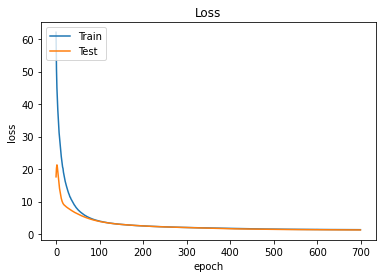

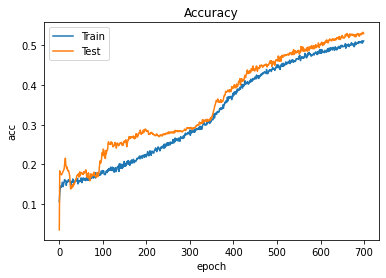

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()



plt.plot(cnnhistory.history['accuracy'])
plt.plot(cnnhistory.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()